In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# Load Dataset

In [4]:
header = pd.read_csv("Dataset/header.csv", header=None)
header

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable


In [5]:
training_dataset = pd.read_csv("Dataset/Training/Features_Variant_2.csv",
                               header=None,
                               names=[header.iat[0, i] for i in range(0, 54)])
training_dataset.sample(n=10)

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
74,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,...,0,0,0,0,0,1,0,0,0,0
62261,2078654,2715,84453,9,0.0,1141.0,158.941463,101.5,175.248928,0.0,...,0,0,0,0,0,0,1,0,0,1
55721,2001197,0,1053,2,0.0,222.0,25.892045,15.0,35.221616,0.0,...,0,0,0,0,0,1,0,0,0,7
63500,11384,0,226,2,0.0,58.0,15.110465,13.0,9.987463,0.0,...,0,0,0,0,0,0,1,0,0,0
37166,55275,0,1834,13,0.0,282.0,4.796748,2.0,16.092530,0.0,...,0,0,0,0,0,1,0,0,0,0
1398,88359,3,42,17,0.0,4.0,0.717949,0.0,1.084831,0.0,...,1,0,0,0,0,0,0,1,0,0
37686,99033,414,1053,32,0.0,204.0,7.346278,2.0,18.236308,0.0,...,0,0,0,0,1,0,0,0,0,3
16178,165002,0,25302,36,0.0,643.0,66.450000,30.0,91.077201,0.0,...,0,0,0,0,0,0,0,0,1,0
56064,39611,3243,612,32,0.0,122.0,4.127907,1.0,13.558484,0.0,...,0,0,0,0,0,0,0,1,0,0
35331,73349,0,1484,18,0.0,69.0,12.658537,9.0,13.328604,0.0,...,0,0,0,1,0,0,0,0,0,4


In [6]:
features = training_dataset.iloc[:, :53]
features

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
0,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,...,0,1,0,0,0,0,0,0,0,1
3,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,...,0,1,0,0,0,0,0,0,0,1
4,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,7170111,70,497000,9,0.0,2147.0,497.620000,226.5,548.462976,0.0,...,0,0,0,0,0,0,1,0,0,0
81308,7170111,70,497000,9,0.0,2147.0,497.620000,226.5,548.462976,0.0,...,0,0,0,0,0,0,0,1,0,0
81309,7170111,70,497000,9,0.0,2147.0,497.620000,226.5,548.462976,0.0,...,0,0,0,0,0,0,0,1,0,0
81310,7170111,70,497000,9,0.0,2147.0,497.620000,226.5,548.462976,0.0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
derived = training_dataset.iloc[:, 4:29]
derived.sample(n=5)

,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,Derived11,Derived12,Derived13,Derived14,...,Derived20,Derived21,Derived22,Derived23,Derived24,Derived25,Derived26,Derived27,Derived28,Derived29
24252,0.0,42.0,7.797235,6.0,7.064899,0.0,35.0,3.069124,1.0,4.803015,...,0.0,38.0,7.382488,6.0,6.834196,-26.0,35.0,0.354839,0.0,7.106068
45874,0.0,5.0,0.483333,0.0,0.896134,0.0,4.0,0.196667,0.0,0.551956,...,0.0,5.0,0.450000,0.0,0.868428,-5.0,4.0,0.020000,0.0,0.808043
37333,0.0,282.0,4.796748,2.0,16.092530,0.0,282.0,2.143631,0.0,14.932312,...,0.0,282.0,4.536585,2.0,15.929022,-25.0,282.0,0.626016,0.0,15.339552
32013,0.0,280.0,18.961538,12.0,30.676013,0.0,125.0,8.105769,2.0,18.297708,...,0.0,270.0,18.259615,11.5,29.523457,-44.0,118.0,0.971154,0.0,18.755746
71487,0.0,1381.0,111.498960,86.0,120.328658,0.0,1344.0,44.182952,6.0,99.636094,...,0.0,1379.0,109.311850,85.0,119.506010,-417.0,1344.0,6.424116,-4.0,122.576443


In [8]:
total_number_of_comments = training_dataset.iloc[:, 29:34]
total_number_of_comments.sample(n=5)

,CC1,CC2,CC3,CC4,CC5
4363,43,0,4,42,-4
54300,121,2,2,117,0
59728,17,1,4,16,-3
38364,2,0,0,2,0
38459,58,1,3,56,-2


In [9]:
post_published_weekday = training_dataset.iloc[:, 39:46]
post_published_weekday.sample(n=5)

,Post published weekday-Sunday,Post published weekday-Monday,Post published weekday-Tuesday,Post published weekday-Wednesday,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday
81016,0,0,0,1,0,0,0
50952,0,0,1,0,0,0,0
32854,0,0,1,0,0,0,0
24644,0,0,0,1,0,0,0
41764,1,0,0,0,0,0,0


In [10]:
for i, row in post_published_weekday.iterrows():
    if sum(row) > 1:
        print("Row " + str(i) + " is more than 1")

In [11]:
base_datetime_weekday = training_dataset.iloc[:, 46:53]
base_datetime_weekday.sample(n=5)

,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
40133,0,0,1,0,0,0,0
24048,0,0,0,0,1,0,0
77109,0,0,0,0,1,0,0
67335,0,0,0,0,0,1,0
56396,0,0,0,0,0,0,1


In [12]:
for i, row in base_datetime_weekday.iterrows():
    if sum(row) > 1:
        print("Row " + str(i) + " is more than 1")

In [13]:
labels = training_dataset.iloc[:, -1:]
labels

,Target Variable
0,0
1,0
2,0
3,3
4,0
...,...
81307,80
81308,12
81309,72
81310,14


In [14]:
pd.concat(
    [total_number_of_comments, post_published_weekday, base_datetime_weekday, labels], axis=1
).sample(n=10)

,CC1,CC2,CC3,CC4,CC5,Post published weekday-Sunday,Post published weekday-Monday,Post published weekday-Tuesday,Post published weekday-Wednesday,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
26205,2,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
20465,15,2,8,12,-6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
14429,32,3,22,29,-19,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
52773,3,1,0,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
18442,3,3,0,3,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
18134,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
55141,9,3,6,8,-3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
65867,11,11,0,11,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2
50903,8,0,0,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
68083,9,0,0,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [15]:
str(training_dataset.shape)

'(81312, 54)'

In [16]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Page Popularity/likes             81312 non-null  int64  
 1   Page Checkinsâ€™s                 81312 non-null  int64  
 2   Page talking about                81312 non-null  int64  
 3   Page Category                     81312 non-null  int64  
 4   Derived5                          81312 non-null  float64
 5   Derived6                          81312 non-null  float64
 6   Derived7                          81312 non-null  float64
 7   Derived8                          81312 non-null  float64
 8   Derived9                          81312 non-null  float64
 9   Derived10                         81312 non-null  float64
 10  Derived11                         81312 non-null  float64
 11  Derived12                         81312 non-null  float64
 12  Deri

In [17]:
training_dataset.describe()

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
count,8.131200e+04,81312.000000,8.131200e+04,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,...,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,1.313921e+06,4667.704336,4.475377e+04,24.255633,0.707190,464.665781,55.728933,35.392255,67.588653,0.143361,...,0.146153,0.136954,0.141049,0.133400,0.138417,0.145477,0.155180,0.144997,0.141480,7.190611
std,6.804951e+06,20561.261034,1.109279e+05,19.949156,12.169748,520.925523,85.243275,67.043844,82.836764,7.819979,...,0.353262,0.343801,0.348075,0.340008,0.345340,0.352583,0.362078,0.352100,0.348518,36.049374
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,47.000000,5.190751,2.000000,8.032349,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,251.000000,22.794183,13.000000,32.565168,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,717.000000,71.791489,42.000000,102.060861,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,1311.000000,2438.000000,1693.500000,1693.500000,743.091650,1311.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1966.000000


## Normalization

In [18]:
def normalize(X, y):
    x_scaler = MinMaxScaler()
    x_scaler.fit(X)
    X_norm = x_scaler.transform(X)
    y_scaler = MinMaxScaler()
    y_scaler.fit(y)
    y_norm = y_scaler.transform(y)
    return X_norm, y_norm

In [19]:
X_norm, y_norm = normalize(features, labels)

In [20]:
training_dataset_norm = pd.concat([pd.DataFrame(X_norm), pd.DataFrame(y_norm)], axis=1)
training_dataset_norm.columns = [header.iat[0, i] for i in range(0, 54)]
training_dataset_norm.sample(n=10)

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
60474,0.002318,0.000000,8.647537e-03,0.076190,0.0,0.232978,0.027510,0.011810,0.111841,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
37547,0.000046,0.000000,7.335045e-04,0.161905,0.0,0.017227,0.006121,0.004724,0.012794,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.001017
30667,0.009295,0.000000,1.824878e-02,0.076190,0.0,0.304348,0.038528,0.018305,0.131695,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000509
31890,0.001213,0.000000,4.161616e-03,0.742857,0.0,0.087777,0.020353,0.014762,0.049563,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.002035
47330,0.000933,0.000000,1.090372e-02,0.904762,0.0,0.096390,0.007886,0.001771,0.039148,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.001526
6428,0.002168,0.000000,1.975470e-02,0.161905,0.0,0.376538,0.095729,0.058459,0.220543,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.005086
55483,0.000007,0.000054,1.642052e-07,0.152381,0.0,0.012715,0.002251,0.001181,0.006764,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
79863,0.003180,0.057965,9.786136e-03,0.076190,0.0,0.578753,0.047171,0.024505,0.168741,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000509
28011,0.000021,0.000032,2.463078e-06,0.171429,0.0,0.000820,0.000204,0.000000,0.000767,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
56625,0.000651,0.000000,1.005018e-02,0.390476,0.0,0.076292,0.009957,0.004133,0.036895,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000


# Exploratory Data Analysis

## Univariate Analysis

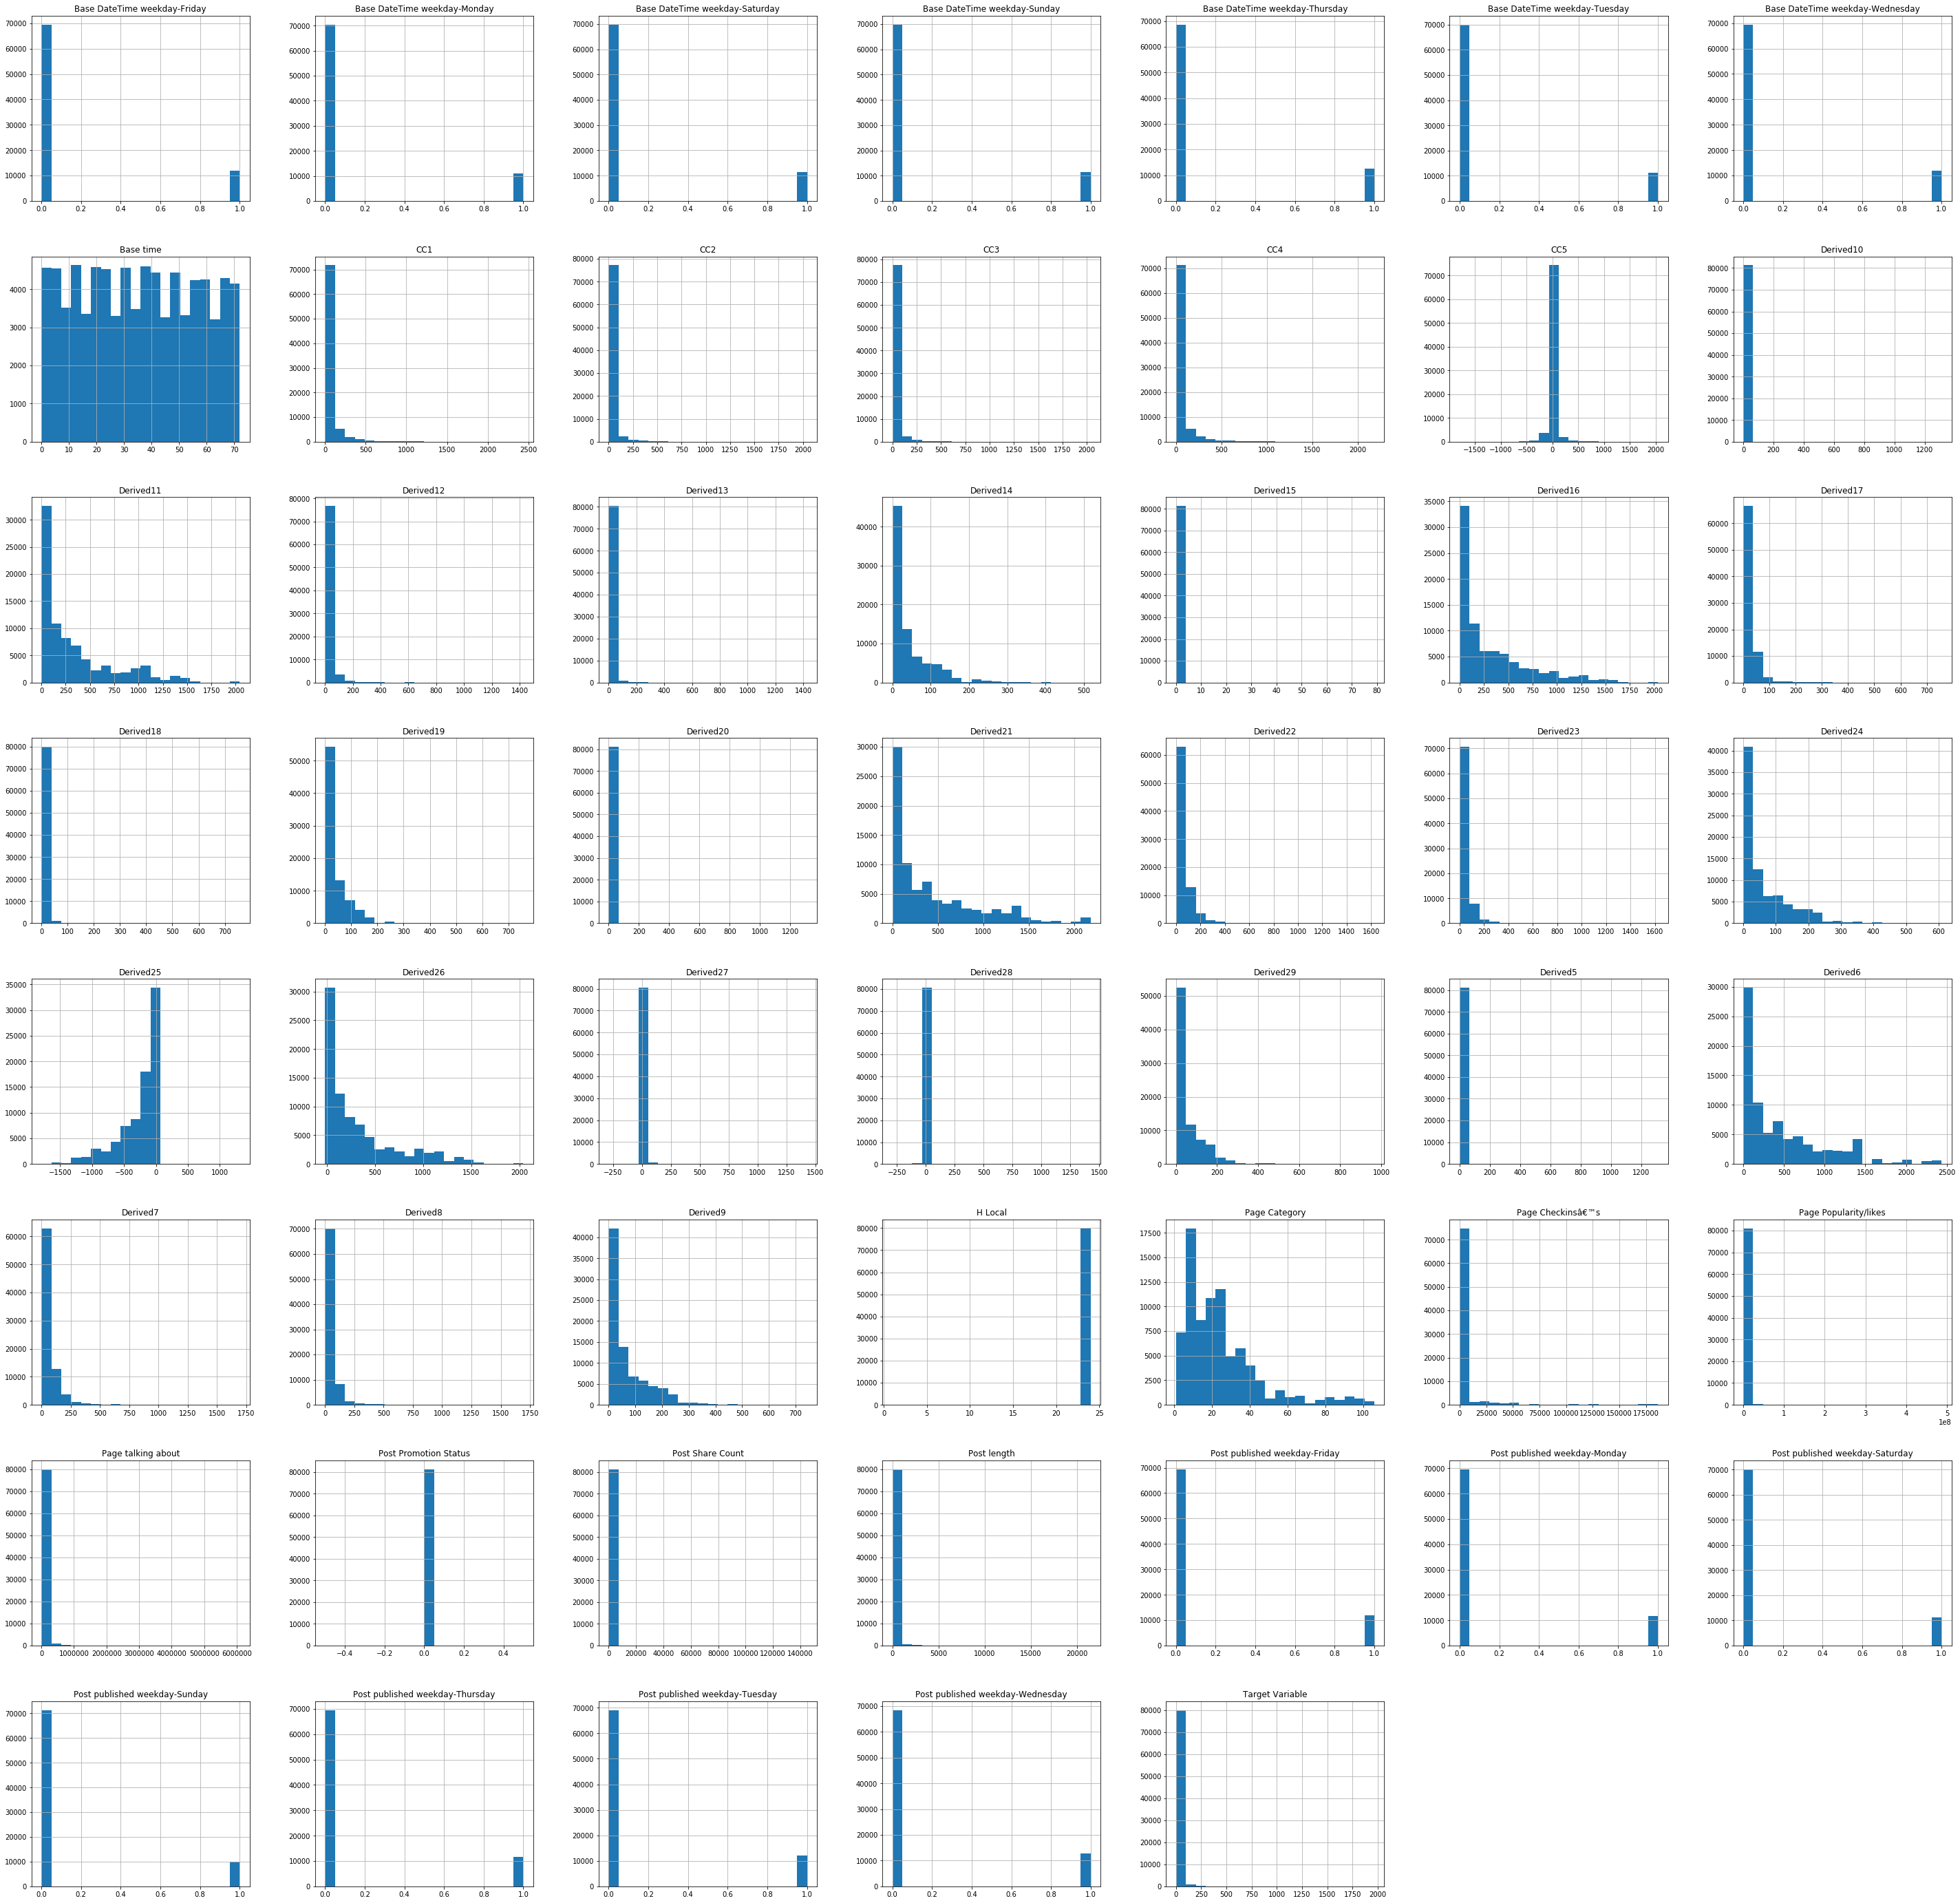

In [21]:
training_dataset.hist(bins=20, figsize=(50, 50))
plt.show()

## Correlation Analysis

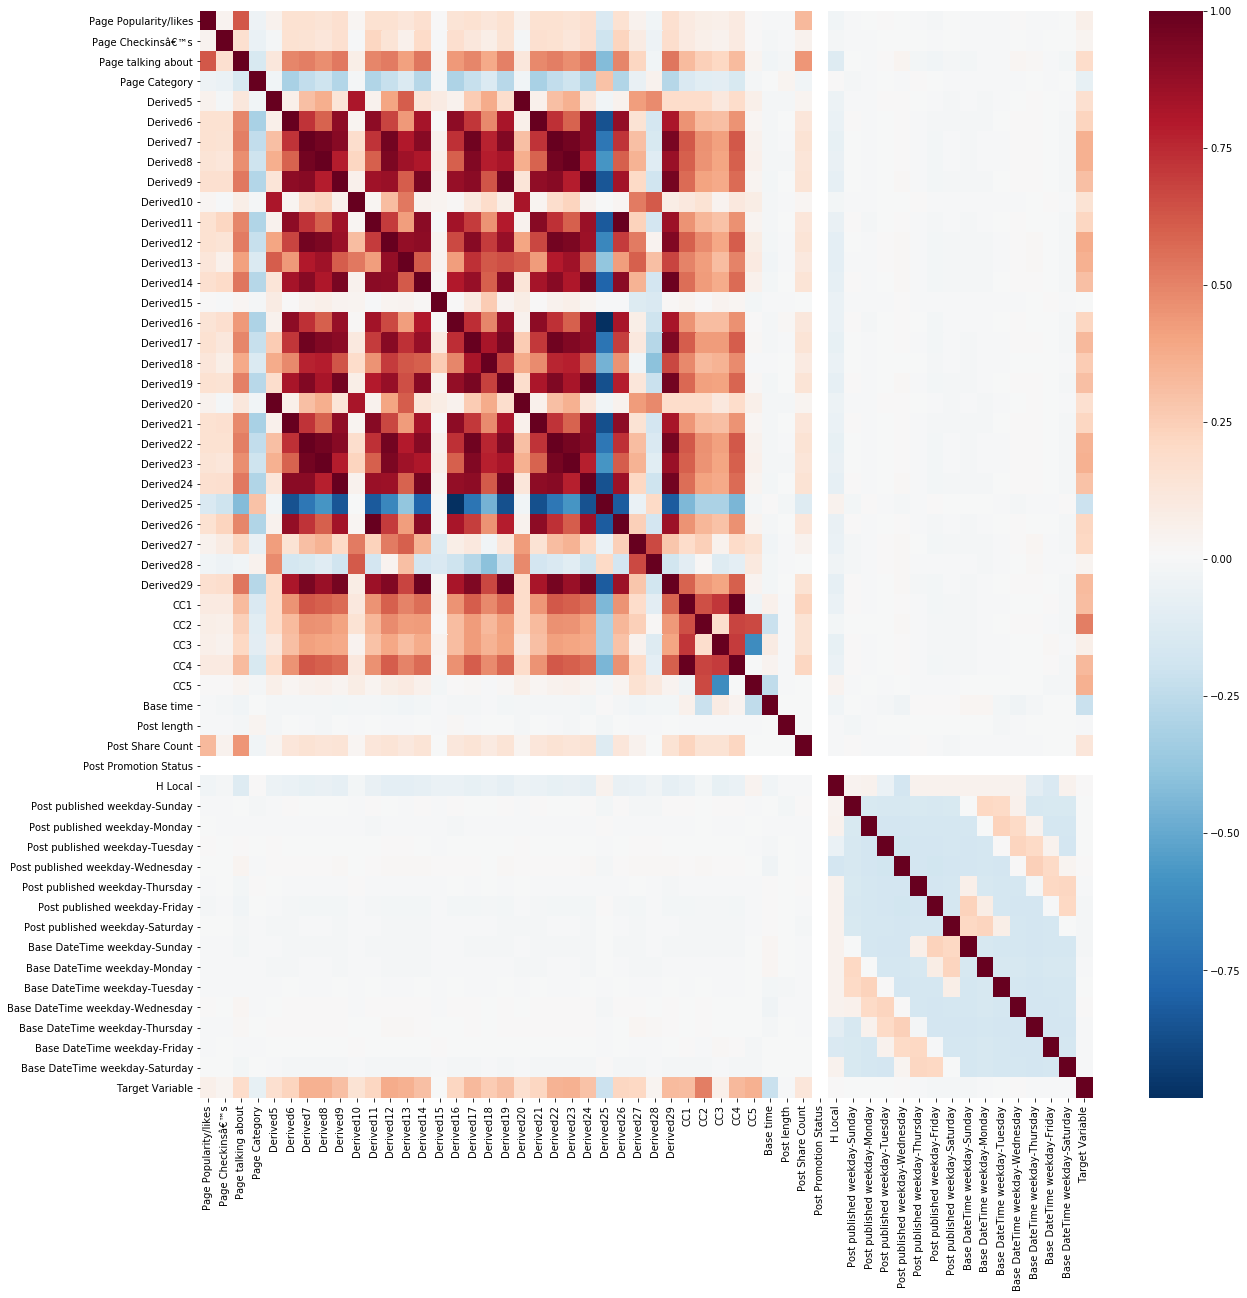

In [22]:
corr = training_dataset.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(data=corr, cmap="RdBu_r")
plt.show()

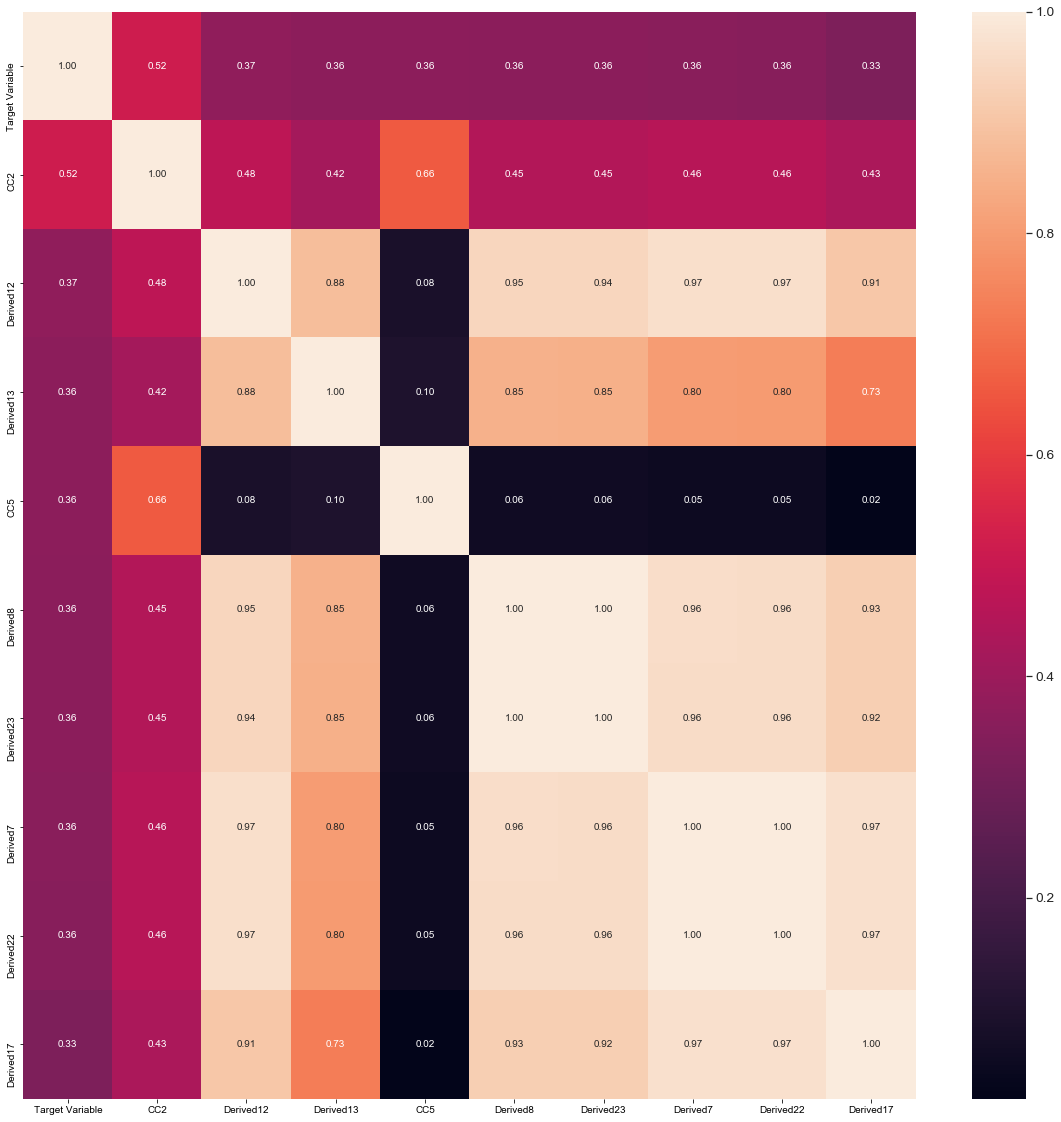

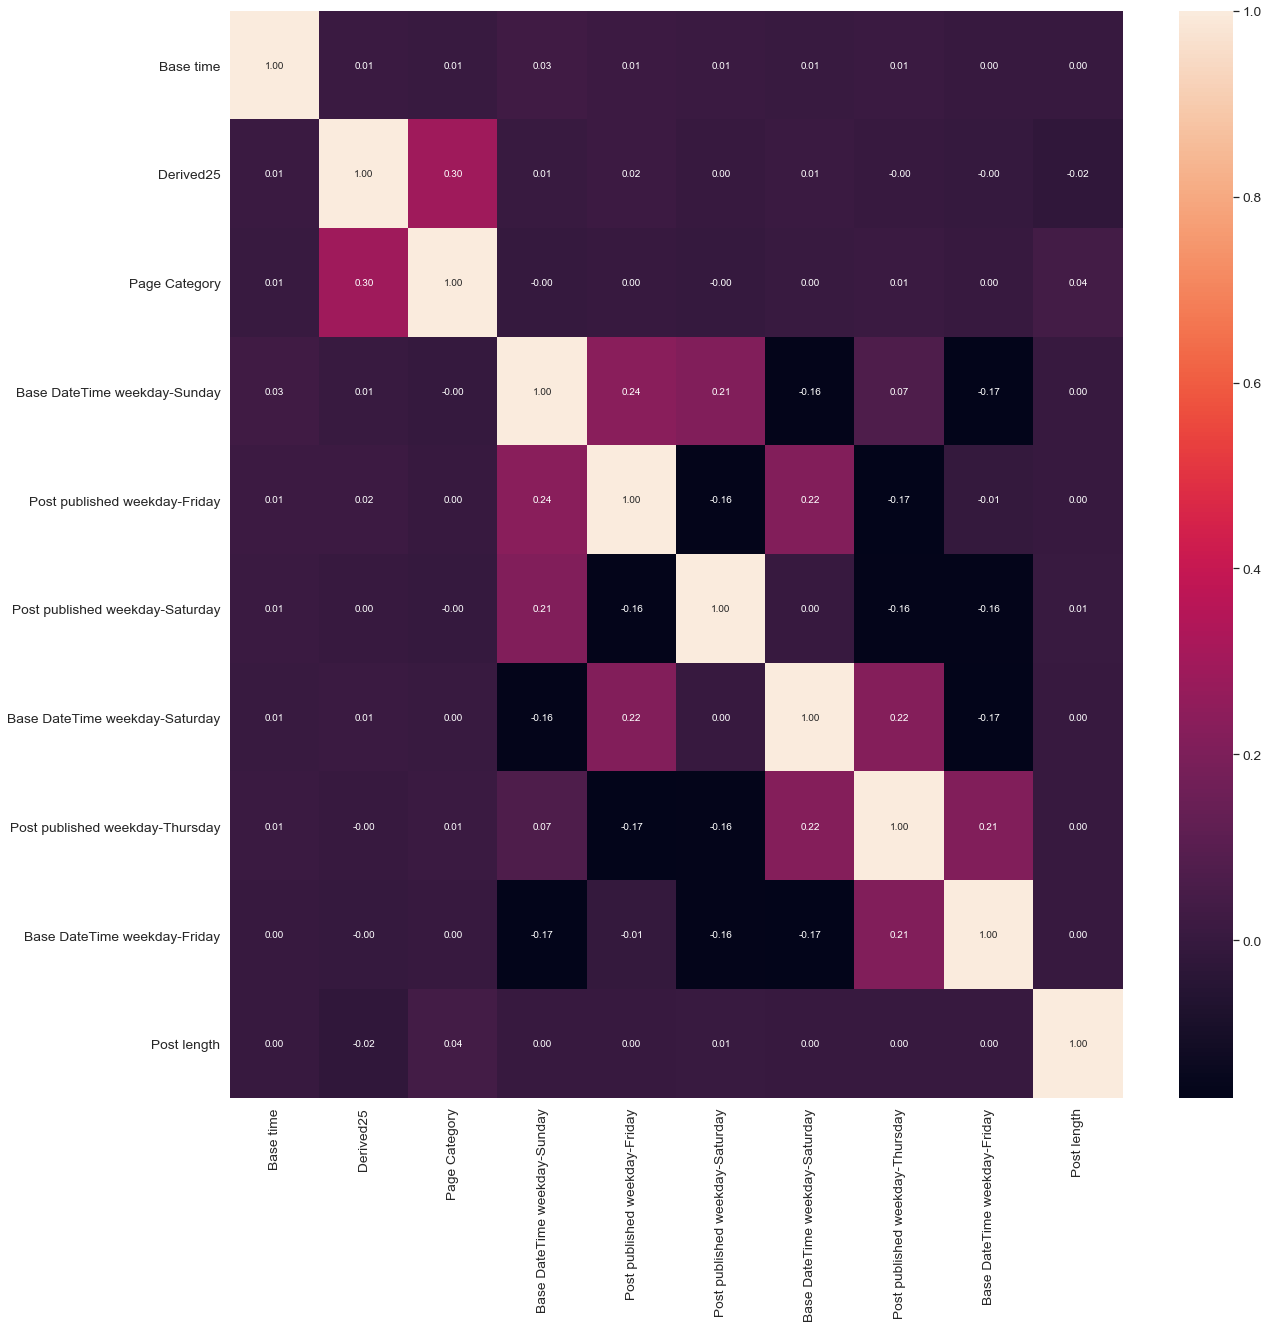

In [23]:
# The 10 most relevant features
plt.subplots(figsize=(20, 20))
c = corr.nlargest(10, 'Target Variable')['Target Variable'].index
cm = np.corrcoef(training_dataset[c].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':10}, yticklabels=c.values, xticklabels=c.values)
plt.show()

plt.subplots(figsize=(20, 20))
c = corr.nsmallest(10, 'Target Variable')['Target Variable'].index
cm = np.corrcoef(training_dataset[c].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':10}, yticklabels=c.values, xticklabels=c.values)
plt.show()

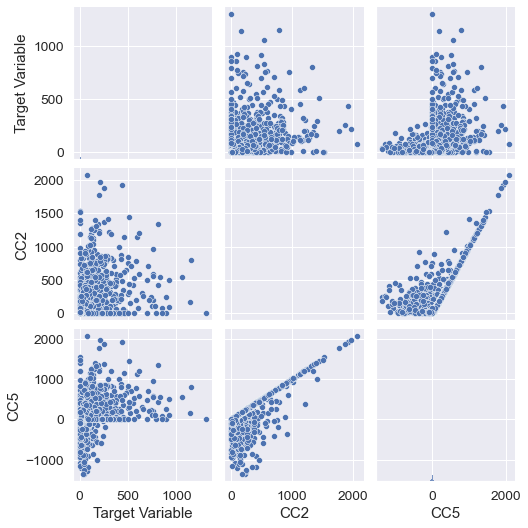

In [22]:
c_scatter = ["Target Variable", "CC2", "CC5"]
pair_scatter = sns.pairplot(training_dataset[c_scatter], height=2.5)
plt.show()

## Bivariate Analysis

### The highest comments in next H hrs is on Wednesday

<AxesSubplot:xlabel='Post published weekday', ylabel='Target variable'>

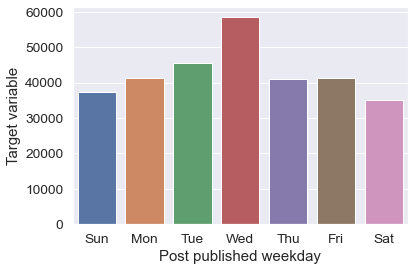

In [23]:
post_published_weekday_target_variable = post_published_weekday.iloc[:, 0:7].multiply(
    labels.iloc[:, 0], axis="index"
).sum()

post_published_weekday_target_variable = pd.DataFrame(
    {
        "Target variable": list(post_published_weekday_target_variable), 
        "Post published weekday": ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    }
)

sns.barplot(x="Post published weekday", y="Target variable", data=post_published_weekday_target_variable)

<AxesSubplot:xlabel='Best datetime weekday', ylabel='Target variable'>

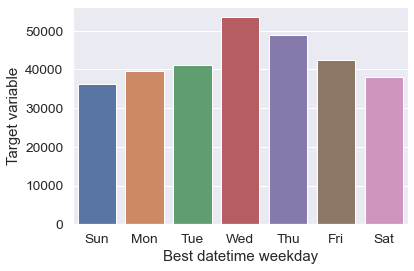

In [24]:
base_datetime_weekday_target_variable = base_datetime_weekday.iloc[:, 0:7].multiply(
    labels.iloc[:, 0], axis="index"
).sum()

base_datetime_weekday_target_variable = pd.DataFrame(
    {
        "Target variable": list(base_datetime_weekday_target_variable), 
        "Best datetime weekday": ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    }
)

sns.barplot(x="Best datetime weekday", y="Target variable", data=base_datetime_weekday_target_variable)

### The highest posts is on Wednesday

<AxesSubplot:xlabel='Post published weekday', ylabel='Count'>

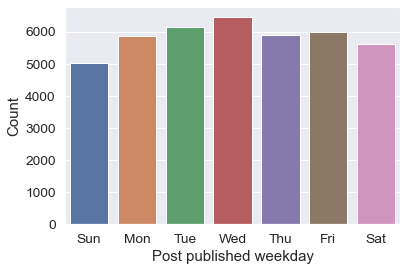

In [25]:
post_published_weekday_count = pd.DataFrame(
    {
        "Count": list(post_published_weekday.iloc[:, 0:7].sum()),
        "Post published weekday": ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    }
)

sns.barplot(x="Post published weekday", y="Count", data=post_published_weekday_count)

<AxesSubplot:xlabel='Best datetime weekday', ylabel='Count'>

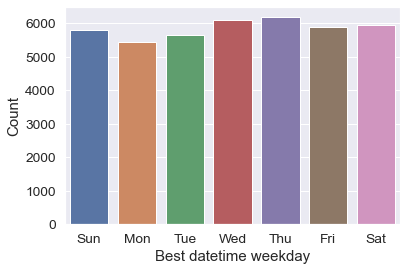

In [26]:
base_datetime_weekday_count = pd.DataFrame(
    {
        "Count": list(base_datetime_weekday.iloc[:, 0:7].sum()),
        "Best datetime weekday": ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    }
)

sns.barplot(x="Best datetime weekday", y="Count", data=base_datetime_weekday_count)

### The highest posts is at 24 H Local

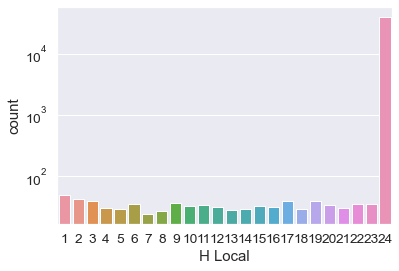

In [27]:
sns.countplot(x=training_dataset["H Local"].astype('int')).set_yscale("log")

### Most of the posts is at 24 H Local except Wednesday and Thursday

In [28]:
h_local_post_published_weekday = pd.concat([training_dataset["H Local"], post_published_weekday], axis=1)
h_local_post_published_weekday = h_local_post_published_weekday.groupby("H Local").sum()
h_local_post_published_weekday

,Post published weekday-Sunday,Post published weekday-Monday,Post published weekday-Tuesday,Post published weekday-Wednesday,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday
H Local,,,,,,,
1,0,0,14,35,0,0,0
2,0,0,12,31,0,0,0
3,0,0,13,27,0,0,0
4,0,0,8,22,0,0,0
5,0,0,8,21,0,0,0
6,0,0,8,27,0,0,0
7,0,0,10,14,0,0,0
8,0,0,6,21,0,0,0
9,0,0,10,27,0,0,0


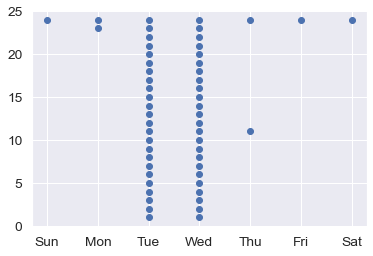

In [29]:
weekdays = pd.DataFrame(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
for i in range(7):
    for j in range(24):
        if h_local_post_published_weekday.iloc[j, i] != 0:
            plt.scatter(weekdays.iloc[i, 0], j + 1, color='b')

In [30]:
h_local_base_datetime_weekday = pd.concat([training_dataset["H Local"], base_datetime_weekday], axis=1)
h_local_base_datetime_weekday = h_local_base_datetime_weekday.groupby("H Local").sum()
h_local_base_datetime_weekday

,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
H Local,,,,,,,
1,0,0,0,0,6,43,0
2,0,0,0,0,7,36,0
3,0,0,0,0,9,31,0
4,0,0,0,0,3,27,0
5,0,0,0,0,8,21,0
6,0,0,0,0,9,26,0
7,0,0,0,0,8,16,0
8,0,0,0,0,5,22,0
9,0,0,0,0,12,25,0


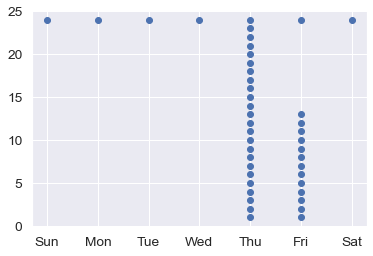

In [31]:
weekdays = pd.DataFrame(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
for i in range(7):
    for j in range(24):
        if h_local_base_datetime_weekday.iloc[j, i] != 0:
            plt.scatter(weekdays.iloc[i, 0], j + 1, color='b')

### Post Promotion Status has no effect on the predection

<AxesSubplot:xlabel='Post Promotion Status', ylabel='count'>

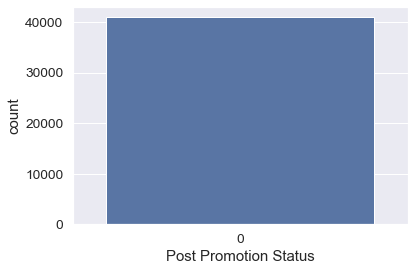

In [32]:
sns.countplot(x=training_dataset["Post Promotion Status"])

### The highest posts categories are 9, 18 and 24

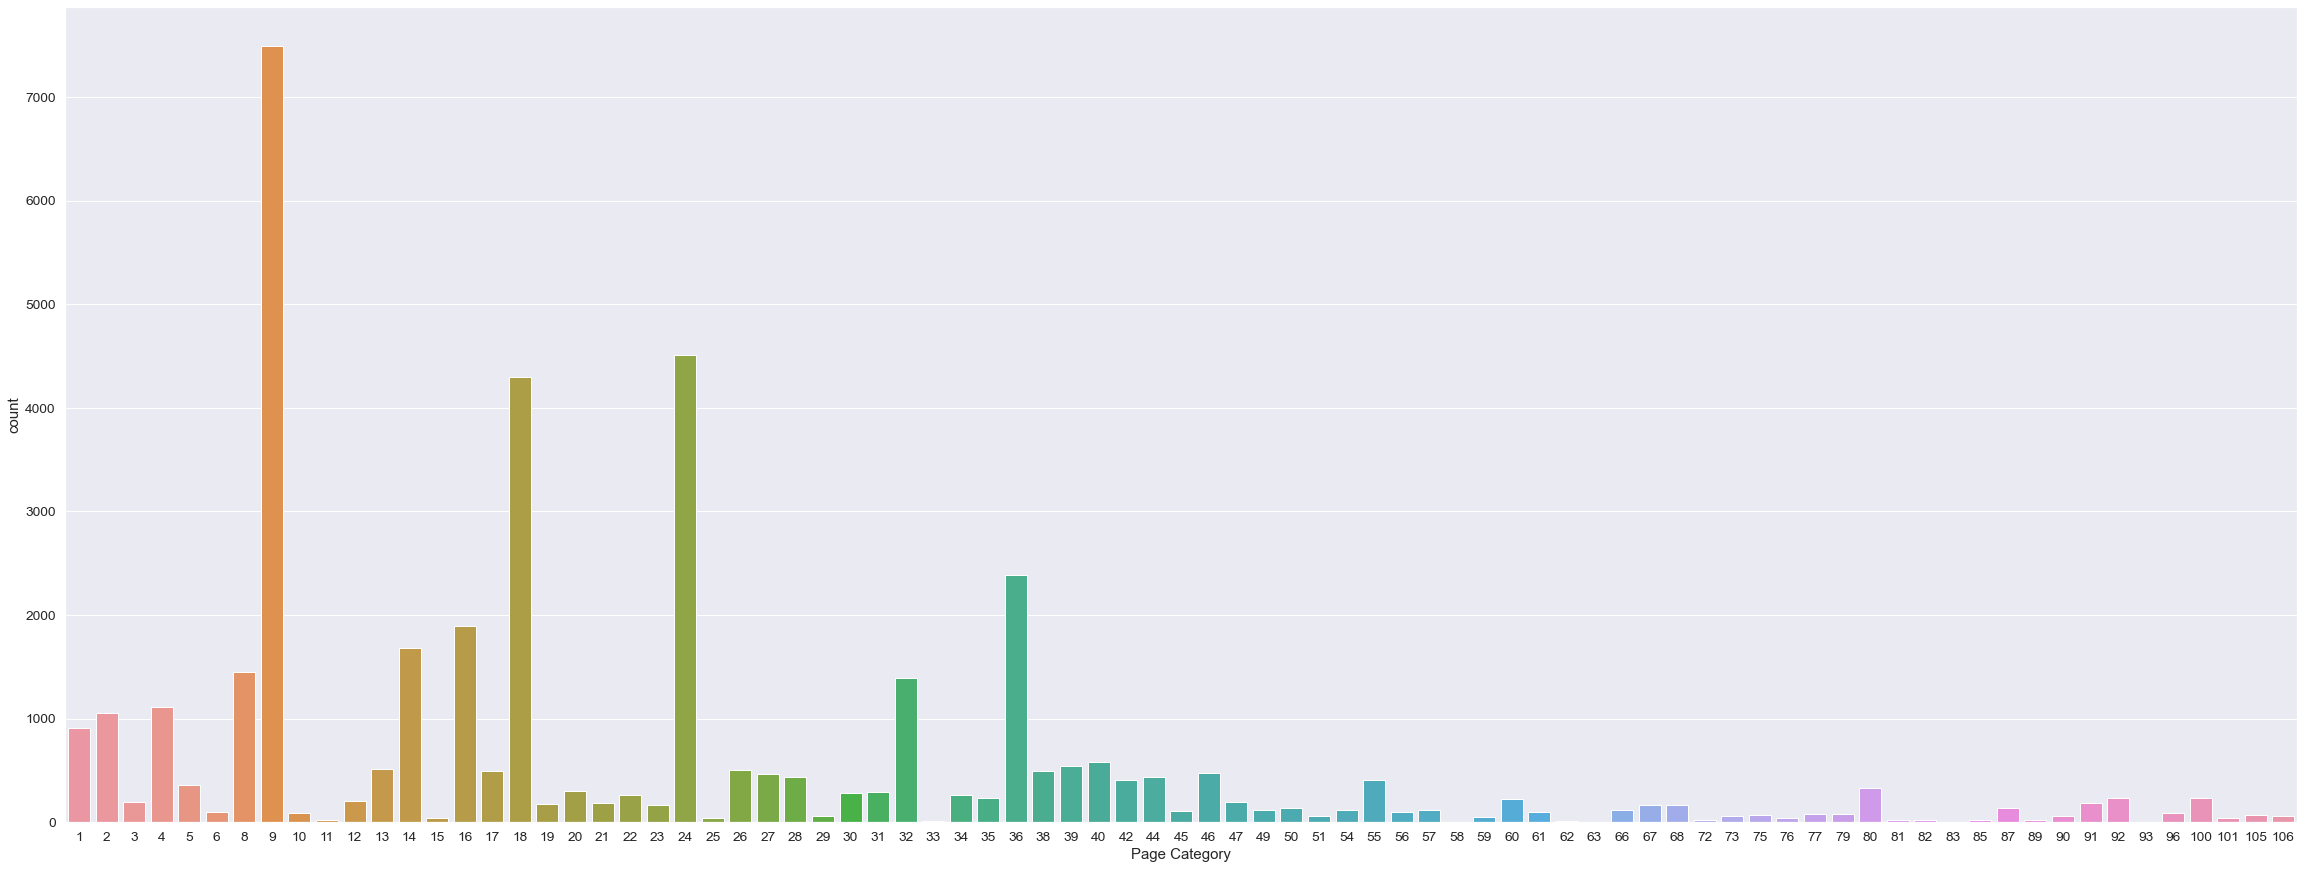

In [33]:
plt.subplots(figsize=(40, 15))
sns.countplot(x=training_dataset["Page Category"])
plt.show()

### The highest popularity category is 9

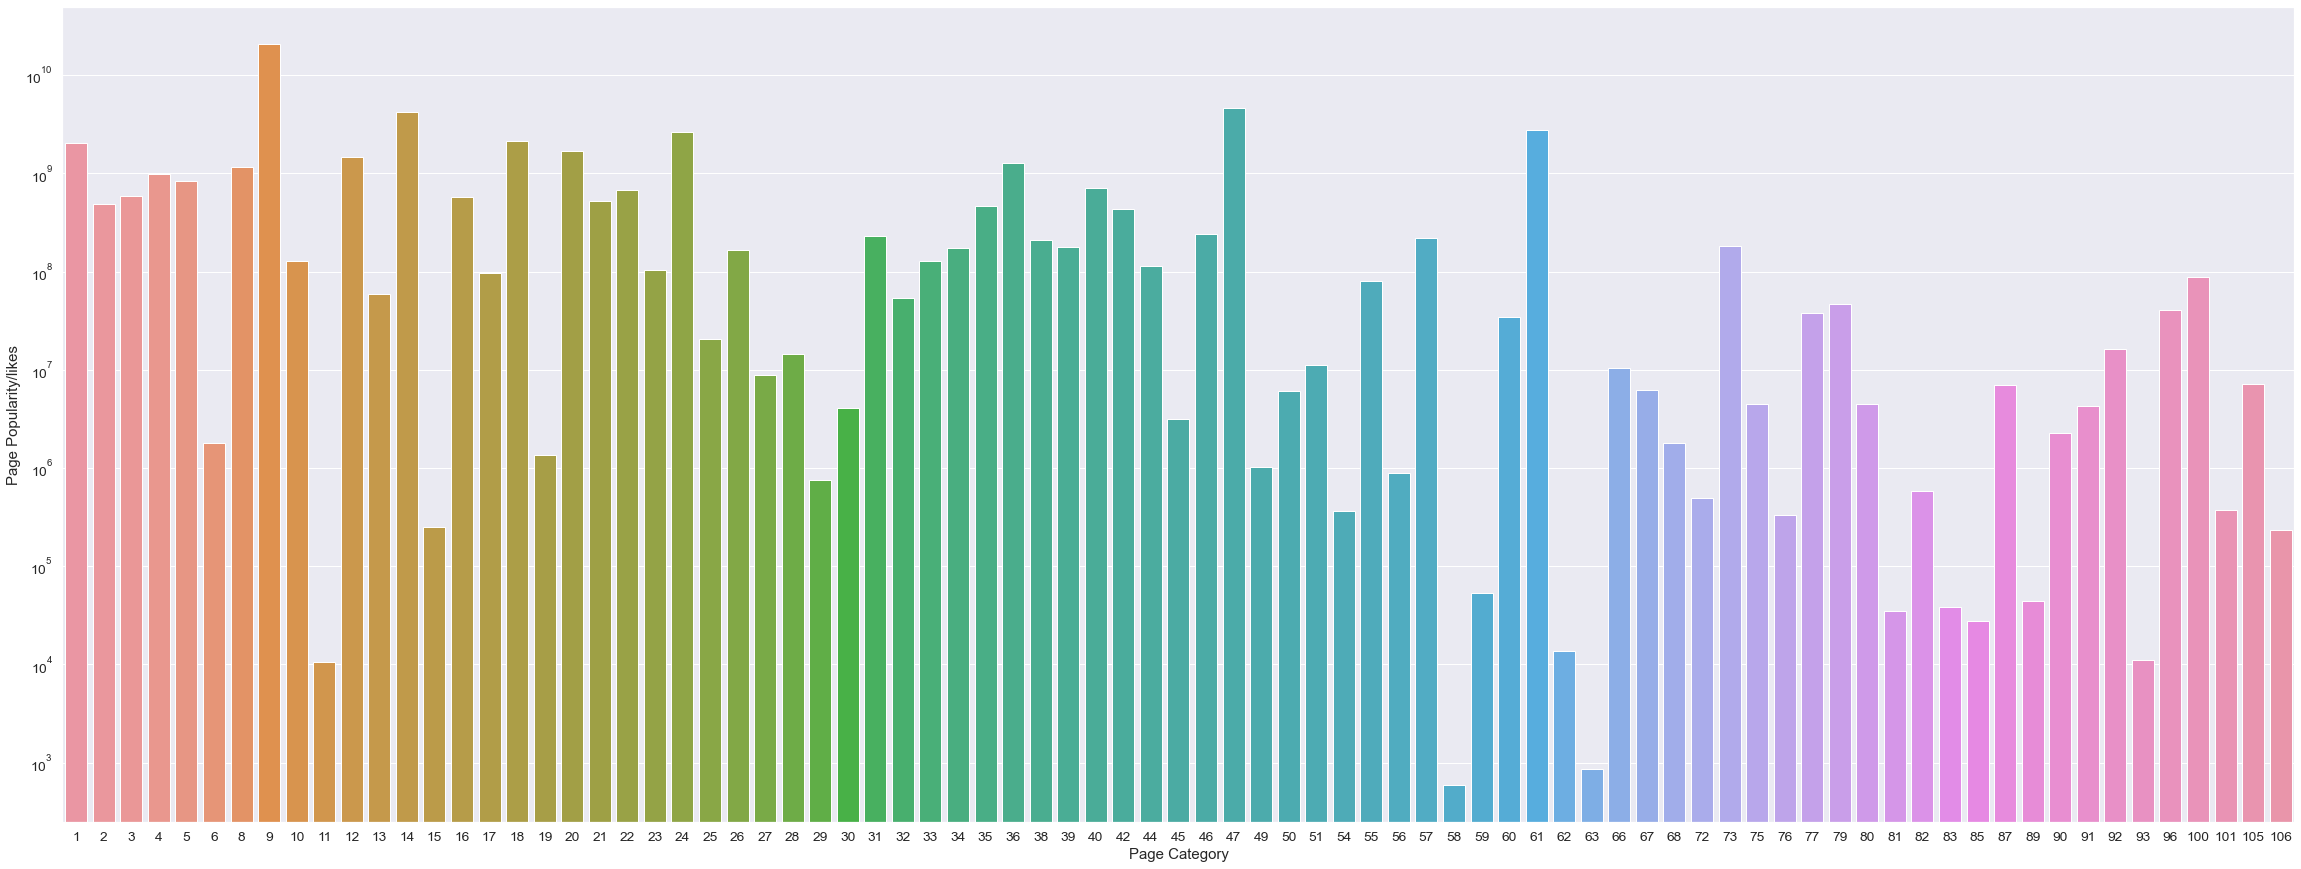

In [34]:
page_popularity_likes_page_category = pd.concat(
    [training_dataset["Page Popularity/likes"], training_dataset["Page Category"]], axis=1
)
page_popularity_likes_page_category = page_popularity_likes_page_category.groupby("Page Category").sum()
page_popularity_likes_page_category.index.name = "Page Category"
page_popularity_likes_page_category.reset_index(inplace=True)
plt.subplots(figsize=(40, 15))
sns.barplot(x="Page Category", y="Page Popularity/likes", data=page_popularity_likes_page_category).set_yscale("log")
plt.show()

### The highest post share count category is 9

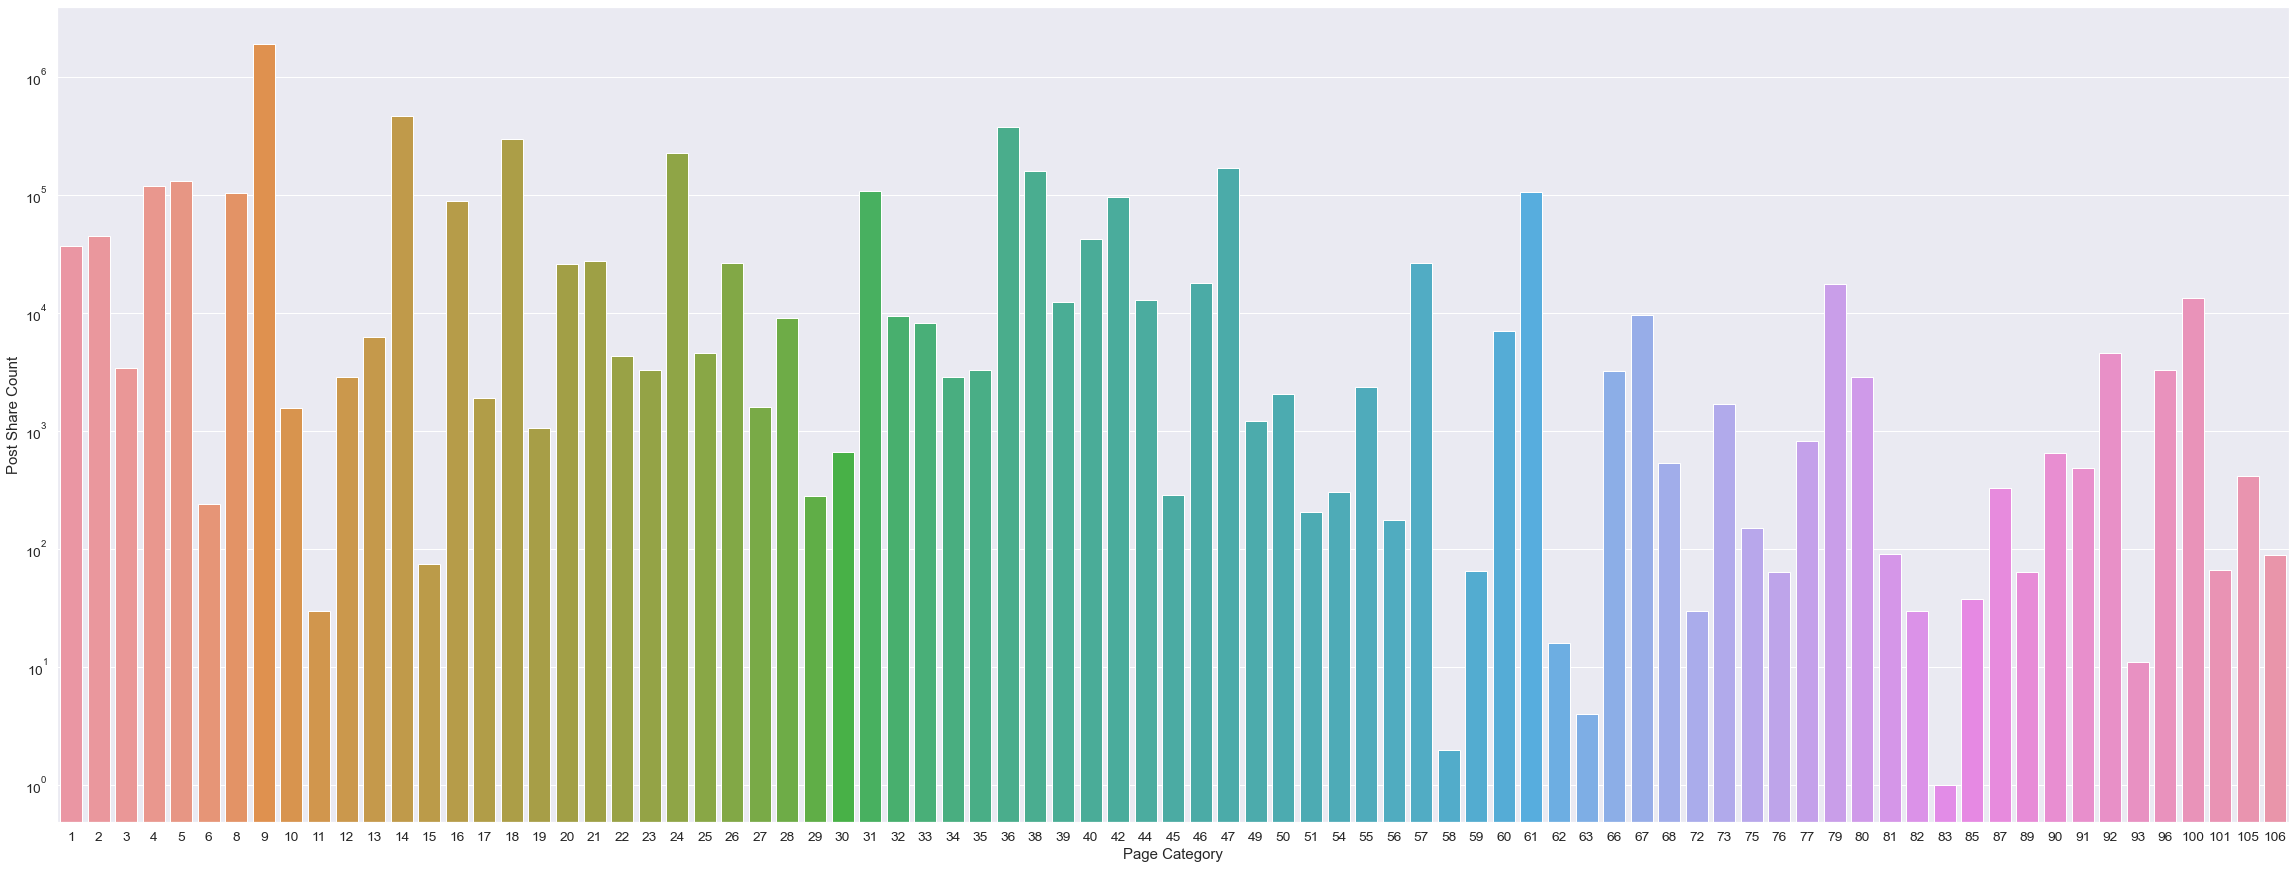

In [35]:
post_share_count_page_category = pd.concat(
    [training_dataset["Post Share Count"], training_dataset["Page Category"]], axis=1
)
post_share_count_page_category = post_share_count_page_category.groupby("Page Category").sum()
post_share_count_page_category.index.name = "Page Category"
post_share_count_page_category.reset_index(inplace=True)
plt.subplots(figsize=(40, 15))
sns.barplot(x="Page Category", y="Post Share Count", data=post_share_count_page_category).set_yscale("log")
plt.show()

### When post is longer, the popularity of the post is lower

<AxesSubplot:xlabel='Post length', ylabel='Page Popularity/likes'>

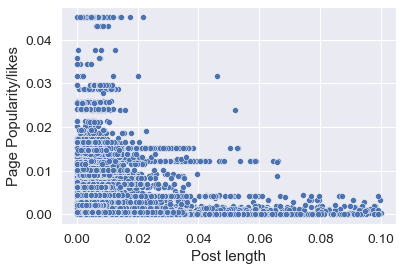

In [36]:
page_popularity_likes_post_length = pd.concat(
    [training_dataset_norm["Page Popularity/likes"], training_dataset_norm["Post length"]], axis=1
)

page_popularity_likes_post_length = page_popularity_likes_post_length[
    page_popularity_likes_post_length["Page Popularity/likes"] < 0.05
]
page_popularity_likes_post_length = page_popularity_likes_post_length[
    page_popularity_likes_post_length["Post length"] < 0.1
]

sns.scatterplot(x="Post length", y="Page Popularity/likes", data=page_popularity_likes_post_length)

<AxesSubplot:xlabel='Page Popularity/likes', ylabel='Post Share Count'>

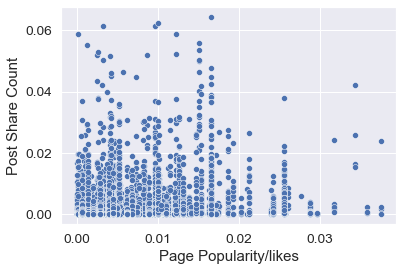

In [37]:
page_popularity_likes_post_share_count = pd.concat(
    [training_dataset_norm["Page Popularity/likes"], training_dataset_norm["Post Share Count"]], axis=1
)

page_popularity_likes_post_share_count = page_popularity_likes_post_share_count[
    page_popularity_likes_post_share_count["Page Popularity/likes"] < 0.04
]
page_popularity_likes_post_share_count = page_popularity_likes_post_share_count[
    page_popularity_likes_post_share_count["Post Share Count"] < 0.07
]

sns.scatterplot(x="Page Popularity/likes", y="Post Share Count", data=page_popularity_likes_post_share_count)

<AxesSubplot:xlabel='Page talking about', ylabel='Post Share Count'>

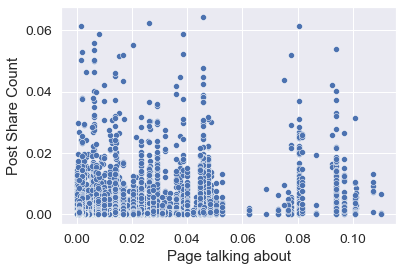

In [38]:
page_talking_about_post_share_count = pd.concat(
    [training_dataset_norm["Page talking about"], training_dataset_norm["Post Share Count"]], axis=1
)

page_talking_about_post_share_count = page_talking_about_post_share_count[
    page_talking_about_post_share_count["Page talking about"] < 0.13
]
page_talking_about_post_share_count = page_talking_about_post_share_count[
    page_talking_about_post_share_count["Post Share Count"] < 0.07
]

sns.scatterplot(x="Page talking about", y="Post Share Count", data=page_talking_about_post_share_count)

<AxesSubplot:xlabel='Page Popularity/likes', ylabel='CC2'>

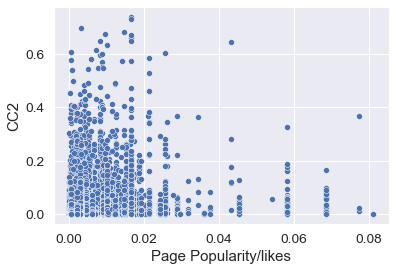

In [39]:
page_popularity_likes_cc2 = pd.concat(
    [training_dataset_norm["Page Popularity/likes"], training_dataset_norm["CC2"]], axis=1
)

page_popularity_likes_cc2 = page_popularity_likes_cc2[
    page_popularity_likes_cc2["Page Popularity/likes"] < 0.1
]
page_popularity_likes_cc2 = page_popularity_likes_cc2[
    page_popularity_likes_cc2["CC2"] < 0.8
]

sns.scatterplot(x="Page Popularity/likes", y="CC2", data=page_popularity_likes_cc2)

### When post is longer, the comments in last 24 hours is fewer

<AxesSubplot:xlabel='Post length', ylabel='CC2'>

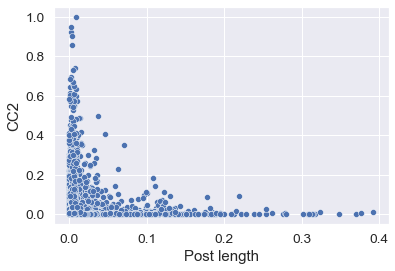

In [40]:
post_length_cc2 = pd.concat(
    [training_dataset_norm["Post length"], training_dataset_norm["CC2"]], axis=1
)

post_length_cc2 = post_length_cc2[
    post_length_cc2["Post length"] < 0.4
]

sns.scatterplot(x="Post length", y="CC2", data=post_length_cc2)